In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
supply = pd.read_csv("archive (2)/supply_data.csv")

In [13]:
supply

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575
...,...,...,...,...,...,...
245,246,01-06-2020,1258,553721,840,1265
246,247,01-07-2020,1483,575451,979,1487
247,248,01-08-2020,1476,615396,977,1373
248,249,01-09-2020,1545,619090,965,1437


In [35]:
demand = pd.read_csv("archive (2)/demand_data.csv")

In [36]:
demand

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48
...,...,...,...,...,...,...
79,2019-10-01,3.60,3.70,19202.310,2.34,212.47
80,2020-01-01,3.80,3.52,18951.992,2.36,215.51
81,2020-04-01,13.07,3.24,17258.205,2.55,217.89
82,2020-07-01,8.80,2.95,18560.774,2.80,222.84


In [18]:
def year(s):
    y = s.split("-")
    return y[-1]

In [20]:
supply["year"]=supply["Period"].apply(year)

In [33]:
supply.drop(["Unnamed: 0"],axis=1,inplace=True)

In [34]:
supply.head()

,Period,Permit_Number,construction,Homes_Sold,Housing_Starts,year
0,01-01-2000,1727,353065,873,1636,2000
1,01-02-2000,1692,351933,856,1737,2000
2,01-03-2000,1651,353452,900,1604,2000
3,01-04-2000,1597,356188,841,1626,2000
4,01-05-2000,1543,349907,857,1575,2000


In [55]:
data = supply.groupby('year').sum()

In [66]:
data.columns

Index(['Permit_Number', 'construction', 'Homes_Sold', 'Housing_Starts'], dtype='object')

In [67]:
data.index

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object', name='year')

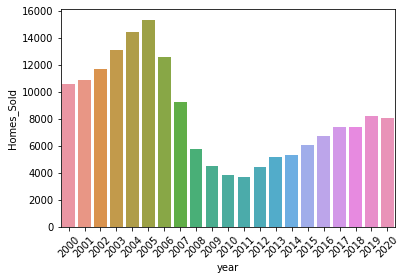

In [71]:
ax = sns.barplot(data=data,x=data.index,y="Homes_Sold")
ax.set_xticklabels(data.index, rotation=45)
plt.show()

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020')]

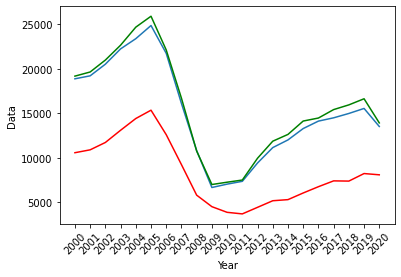

In [97]:
fig, ax = plt.subplots()
ax= sns.lineplot(x=data.index, y="Homes_Sold", data=data,color="red")
ax1 = sns.lineplot(x=data.index, y='Housing_Starts', data=data)
ax2 = sns.lineplot(x=data.index, y='Permit_Number', data=data,color="green")
ax.set(xlabel='Year', ylabel='Data')
ax.set_xticklabels(data.index, rotation=45)

In [81]:
demand

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48
...,...,...,...,...,...,...
79,2019-10-01,3.60,3.70,19202.310,2.34,212.47
80,2020-01-01,3.80,3.52,18951.992,2.36,215.51
81,2020-04-01,13.07,3.24,17258.205,2.55,217.89
82,2020-07-01,8.80,2.95,18560.774,2.80,222.84


In [82]:
def year2(s):
    return s.split("-")[0]

In [83]:
demand['year'] = demand['DATE'].apply(year2)

In [84]:
demand

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,year
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,2000
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,2000
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,2000
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,2000
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,2001
...,...,...,...,...,...,...,...
79,2019-10-01,3.60,3.70,19202.310,2.34,212.47,2019
80,2020-01-01,3.80,3.52,18951.992,2.36,215.51,2020
81,2020-04-01,13.07,3.24,17258.205,2.55,217.89,2020
82,2020-07-01,8.80,2.95,18560.774,2.80,222.84,2020


In [85]:
data_2 = demand.groupby('year').sum()

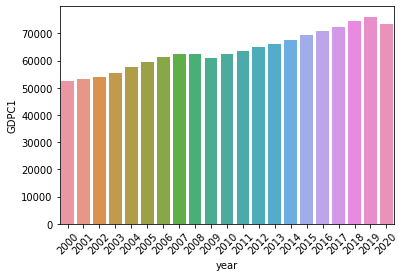

In [89]:
ax = sns.barplot(data=data_2,x=data.index,y="GDPC1")
ax.set_xticklabels(data_2.index, rotation=45)
plt.show()

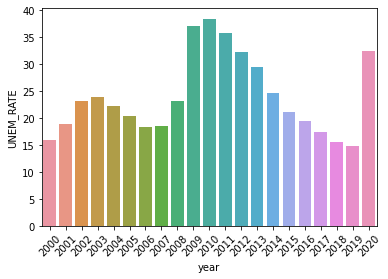

In [90]:
ax = sns.barplot(data=data_2,x=data.index,y="UNEM_RATE")
ax.set_xticklabels(data_2.index, rotation=45)
plt.show()

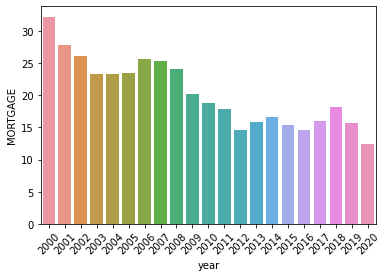

In [91]:
ax = sns.barplot(data=data_2,x=data.index,y="MORTGAGE")
ax.set_xticklabels(data_2.index, rotation=45)
plt.show()

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020')]

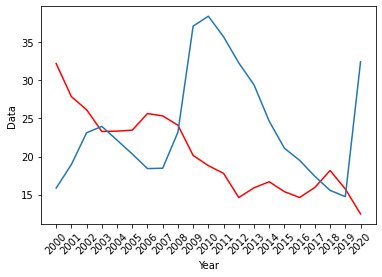

In [96]:
fig, ax = plt.subplots()
ax= sns.lineplot(x=data_2.index, y="MORTGAGE", data=data_2,color="red")
ax1 = sns.lineplot(x=data_2.index, y='UNEM_RATE', data=data_2)
ax.set(xlabel='Year', ylabel='Data')
ax.set_xticklabels(data_2.index, rotation=45)

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


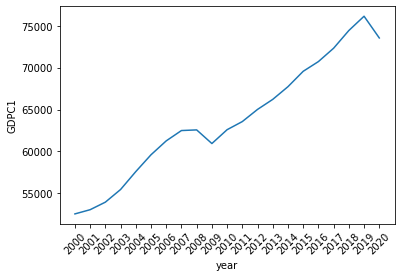

In [102]:
ax = sns.lineplot(data=data_2,x=data.index,y="GDPC1")
ax.set_xticklabels(data_2.index, rotation=45)
plt.show()

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


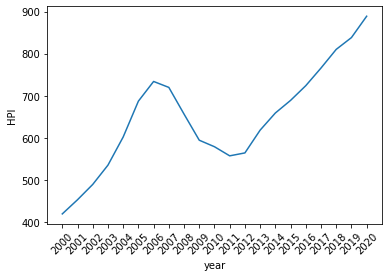

In [101]:
ax = sns.lineplot(data=data_2,x=data.index,y="HPI")
ax.set_xticklabels(data_2.index, rotation=45)
plt.show()